[Persim 0.3.1 documentation](https://persim.scikit-tda.org/en/latest/notebooks/Persistence%20images.html#Generate-a-persistence-diagram-using-Ripser)

In [1]:
from itertools import product

import time
import numpy as np
from sklearn import datasets
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt

from ripser import Rips
from persim import PersistenceImager

import os

import seaborn
import pandas as pd

In [2]:
# data = np.loadtxt(r"C:\Users\yui\OneDrive\Code\Py\TDA\myfed_attack_save\vr_metric04-22--17-43-28.dat")
dir = os.listdir("./metric")
data = []
for metric in dir:
    if metric[len("vr_metric_convFeature_0-10="):len("vr_metric_convFeature_0-10=")+len("merge")] == "merge":
        data.append([np.loadtxt("./metric/"+metric), metric])
        print(metric)

vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--21-30-03.pth06-16--18-57-22.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-12-15.pth06-16--18-57-41.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-12-21.pth06-16--18-58-04.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-12-25.pth06-16--18-58-41.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-02.pth06-16--18-59-00.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-11.pth06-16--18-59-38.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-29.pth06-16--19-00-01.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-32.pth06-16--19-00-23.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-50.pth06-16--19-00-42.dat
vr_metric_convFeature_0-10=merge_cifartest_attack0normal15_06-05--22-13-54.pth06-16--19-01-00.dat
vr_metric_convFeatur

In [3]:
# # data = np.loadtxt(r"C:\Users\yui\OneDrive\Code\Py\TDA\myfed_attack_save\vr_metric04-22--17-43-28.dat")
# dir = os.listdir("./metric")
# at = 9
# no = 0
# for mt in dir:
#     if mt[16:16+len("attack"+str(at)+"normal"+str(no))] == "attack"+str(at)+"normal"+str(no) :
#         data = np.loadtxt("./metric/"+mt)
#         name = mt
#         print(name)

In [4]:
for i in range(len(data)):
    data[i][0] = abs(data[i][0]) * 100
    test = [j for j in data[i][0][0:-1] if j.any() != 0]
    test = np.array(test)
    # print(test.shape)
    test = [j for j in test.T[:,0:-1] if j.any() != 0]
    # grid = pd.DataFrame(test)
    # plot = seaborn.heatmap(grid)
    # plt.title("data")
    # plt.show()
    test = np.array(test)
    if test.shape[0] > test.shape[1]:
        test = test[0:test.shape[1],:]
    elif test.shape[0] < test.shape[1]:
        test = test[:,0:test.shape[0]]
    data[i][0] = np.array(test)
# data = data[-3:-1]
# for i in range(len(data)):
#     data[i][0] = abs(data[i][0]) * 100
#     test = [j for j in data[i][0][0:-1] if j.any() != 0]
#     test = np.array(test)
#     print(test.shape)
#     print(test)

In [5]:
# points = []

# for i in range(data.shape[0]):
#     for j in range(data.shape[1]):
#         points.append([i, j, abs(data[i][j])])

# x=[point[0] for point in points]
# y=[point[1] for point in points]
# z=[point[2] for point in points]

# fig=plt.figure(dpi=120)
# ax=fig.add_subplot(111,projection='3d')
# plt.title('point cloud')
# ax.scatter(x,y,z,c='b',marker='.',s=2,linewidth=0,alpha=1,cmap='spectral')

# #ax.set_facecolor((0,0,0))
# ax.axis('auto')
# # ax.xaxis.set_visible(False)
# # ax.yaxis.set_visible(False)
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')
# plt.show()

In [6]:
rips = Rips(maxdim=2)
dgms = []
H0_dgm = []
H1_dgm = []
for d in data:
    dgms.append(rips.fit_transform(d[0], distance_matrix = True))
    H1_dgm.append([dgms[-1][1],d[1]])
    H0_dgm.append([dgms[-1][0],d[1]])


Rips(maxdim=2, thresh=inf, coeff=2, do_cocycles=False, n_perm = None, verbose=True)


In [7]:
def gridsize(h_gdm):
    s = [999,0,999,0]
    for h in h_gdm:
        s[0] = s[0] if h[0] > s[0] else h[0]
        s[1] = s[1] if h[0] < s[1] else h[0]
        s[2] = s[2] if h[1] > s[2] else h[1]
        s[3] = s[3] if h[1] < s[3] else h[1]
    return s
def makegrid(h_gdm, s):
    height = (s[1] - s[0]) / 126
    weight = (s[3] - s[2]) / 126
    grid = np.zeros((128,128))
    for h in h_gdm:
        x = y = 0
        while 1:
            if (h[0] < s[0] + x * height):
                break
            x += 1
        while 1:
            if (h[1] < s[2] + y * weight):
                break
            y += 1
        grid[x][y] += 1
    return grid

In [8]:
for h1 in H1_dgm:
    print(len(h1[0]))
    print(gridsize(h1[0]))
    print(makegrid(h1[0],gridsize(h1[0])))
    # np.savetxt("./grids/h_"+h1[1]+".dat", makegrid(h1[0],gridsize(h1[0])))

35
[2.24399995803833, 10.0, 5.144999980926514, 14.87600040435791]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
37
[2.312000036239624, 19.016000747680664, 5.576000213623047, 19.132999420166016]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
33
[2.2160000801086426, 13.541999816894531, 5.508999824523926, 17.524999618530273]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
35
[2.38700008392334, 22.523000717163086, 5.835999965667725, 23.954999923706055]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
37
[3.3410000801086426, 14.276000022888184, 5.889999866485596, 1

In [9]:
# dir = os.listdir("./grids")
# for Gr in dir:
#     grid = np.loadtxt("./grids/"+Gr)
#     grid = pd.DataFrame(grid)

#     plot = seaborn.heatmap(grid)
#     plt.title(Gr)
#     plt.show()

35
[2.24399995803833, 10.0, 5.144999980926514, 14.87600040435791]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


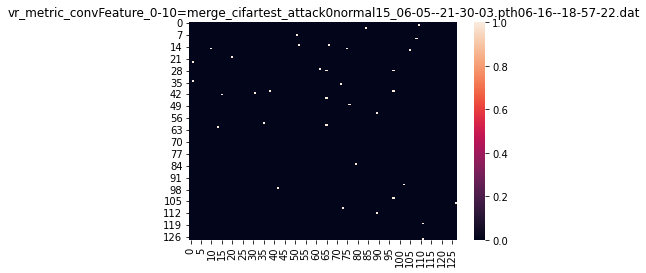

37
[2.312000036239624, 19.016000747680664, 5.576000213623047, 19.132999420166016]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


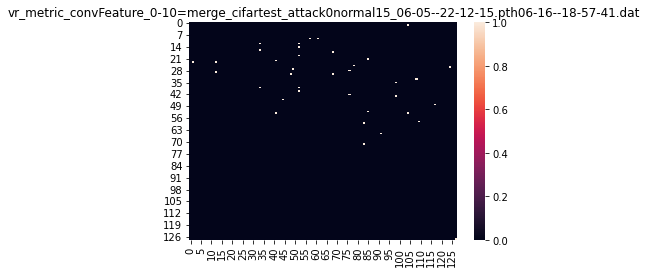

33
[2.2160000801086426, 13.541999816894531, 5.508999824523926, 17.524999618530273]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


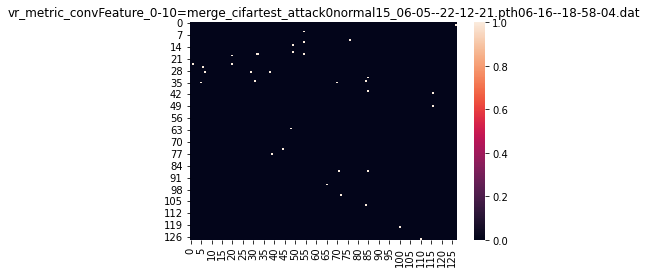

35
[2.38700008392334, 22.523000717163086, 5.835999965667725, 23.954999923706055]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


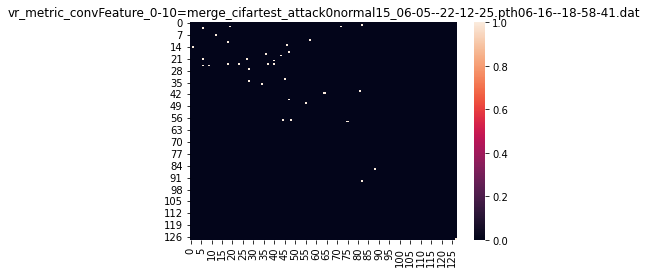

37
[3.3410000801086426, 14.276000022888184, 5.889999866485596, 18.1200008392334]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


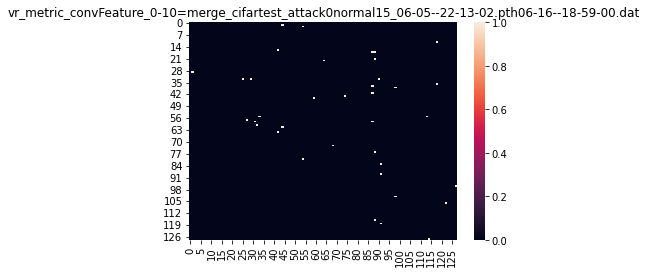

30
[1.8760000467300415, 13.177000045776367, 5.624000072479248, 15.814000129699707]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


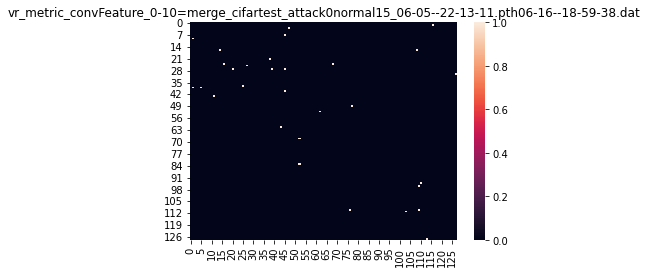

33
[3.553999900817871, 15.928999900817871, 4.131999969482422, 18.214000701904297]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


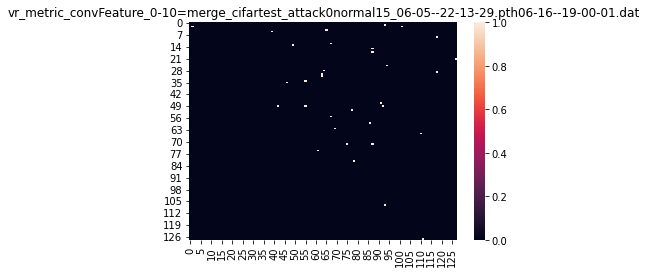

42
[2.9579999446868896, 13.973999977111816, 5.236999988555908, 15.987000465393066]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


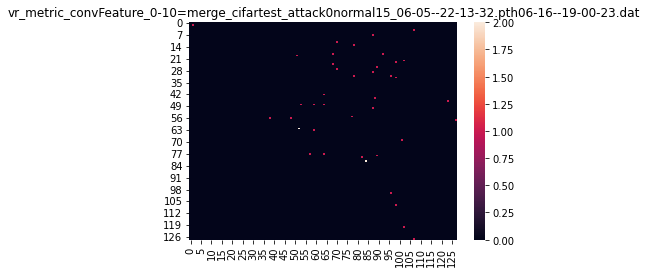

26
[1.3910000324249268, 13.670999526977539, 4.2129998207092285, 16.788000106811523]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


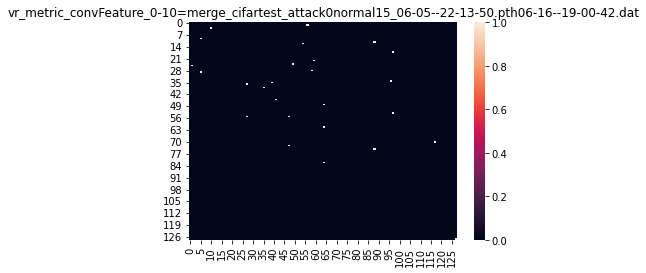

37
[2.628999948501587, 11.854999542236328, 7.320000171661377, 16.115999221801758]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


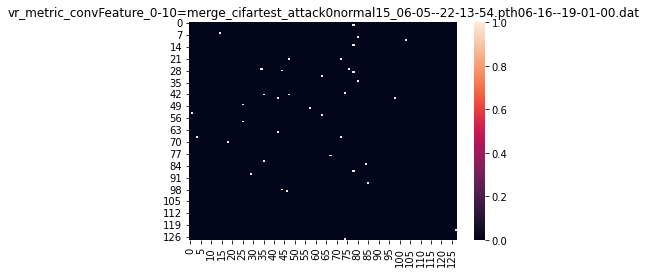

34
[2.7039999961853027, 7.710999965667725, 4.296999931335449, 11.831999778747559]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


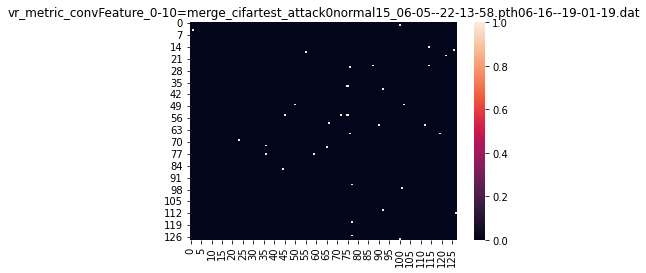

24
[1.9819999933242798, 13.508999824523926, 5.185999870300293, 18.909000396728516]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


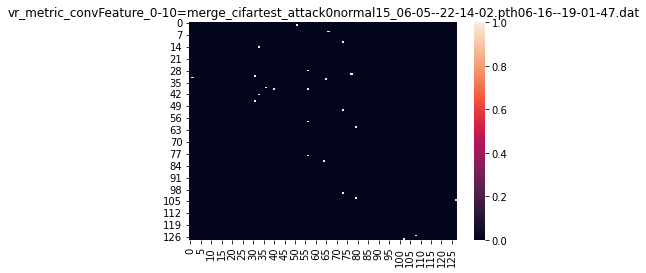

31
[1.430999994277954, 11.939000129699707, 3.1640000343322754, 13.85099983215332]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


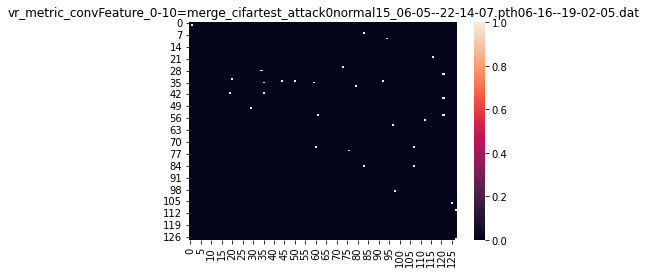

34
[1.565999984741211, 11.177000045776367, 5.085999965667725, 16.26300048828125]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


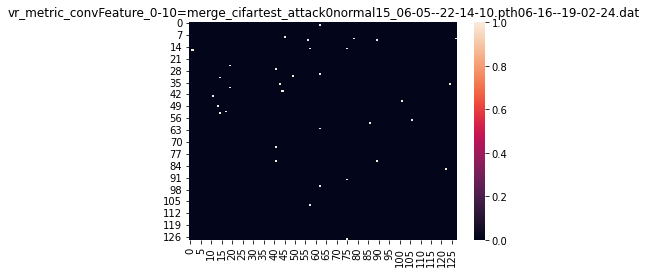

37
[2.171999931335449, 14.16100025177002, 6.485000133514404, 15.63700008392334]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


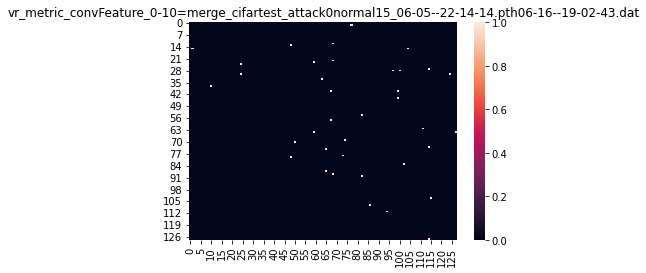

35
[1.125, 13.352999687194824, 4.375, 17.086000442504883]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


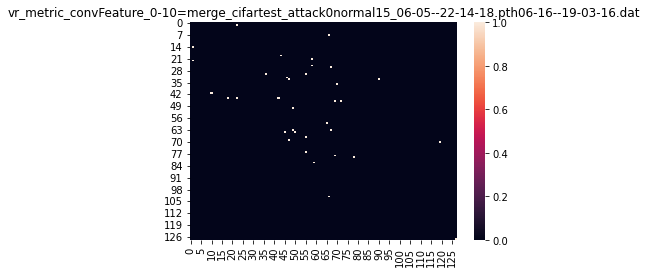

38
[1.315999984741211, 15.60099983215332, 4.948999881744385, 17.816999435424805]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


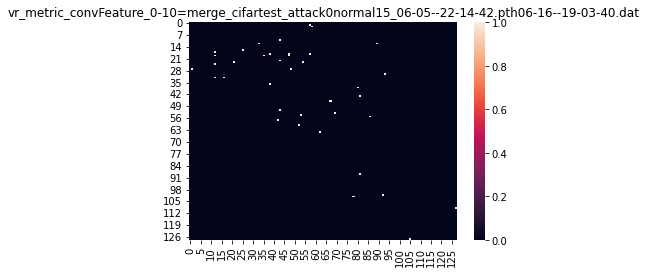

36
[1.3209999799728394, 11.758000373840332, 6.177000045776367, 15.053999900817871]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


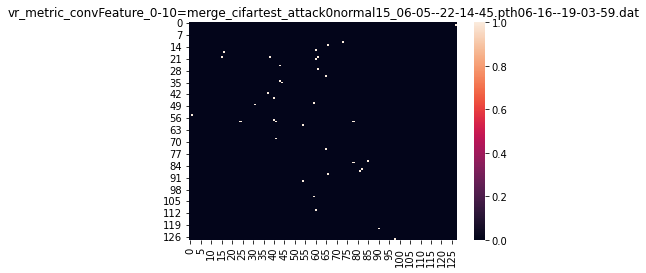

30
[1.5429999828338623, 12.484999656677246, 3.1489999294281006, 15.074000358581543]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


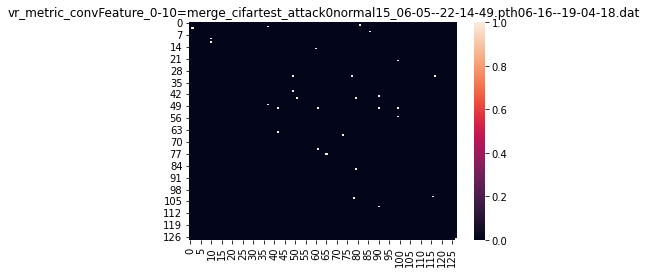

34
[2.1470000743865967, 15.024999618530273, 2.7730000019073486, 16.73699951171875]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


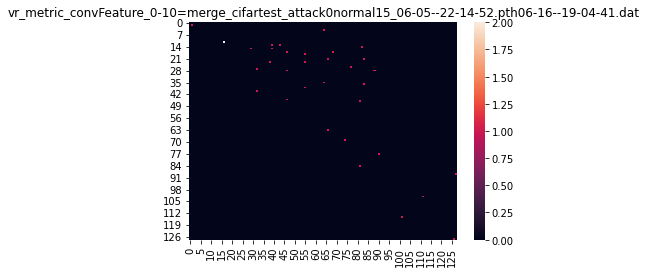

40
[1.3600000143051147, 12.689000129699707, 5.429999828338623, 18.326000213623047]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


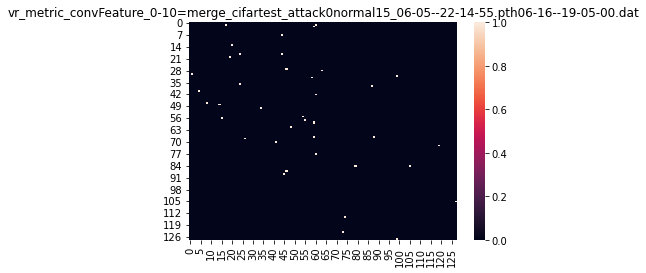

33
[1.8869999647140503, 10.29800033569336, 3.503999948501587, 11.348999977111816]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


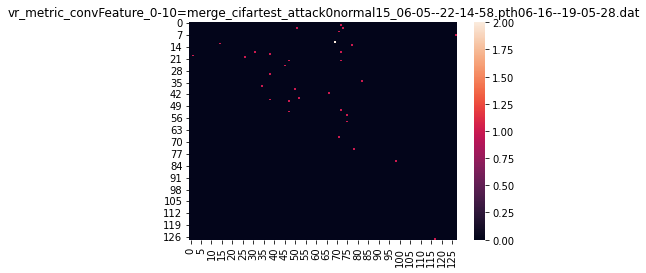

31
[2.3380000591278076, 9.979999542236328, 3.996999979019165, 13.74899959564209]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


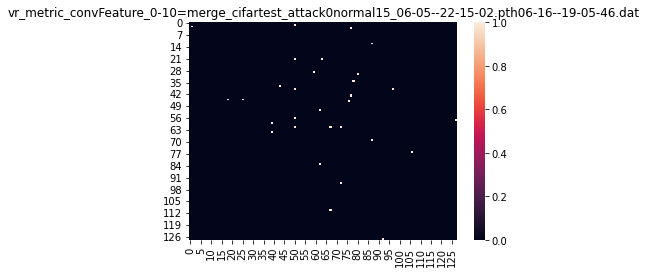

33
[1.8040000200271606, 14.119999885559082, 2.4070000648498535, 15.07800006866455]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


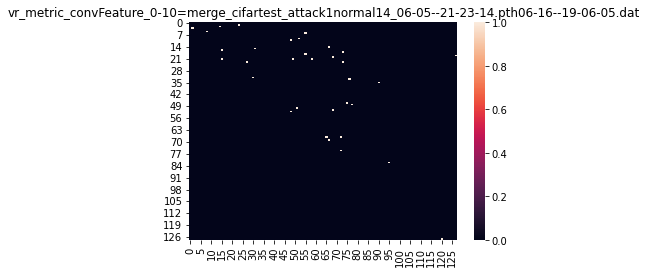

35
[2.2070000171661377, 14.619999885559082, 6.625, 18.716999053955078]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


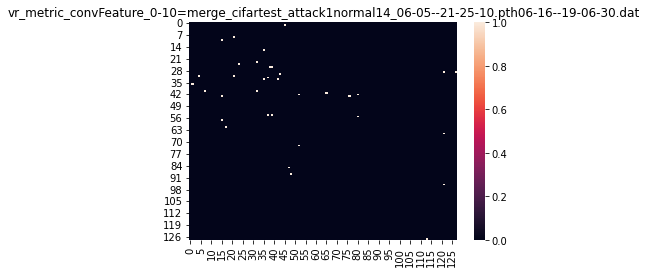

36
[1.88100004196167, 12.397000312805176, 2.996999979019165, 19.058000564575195]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


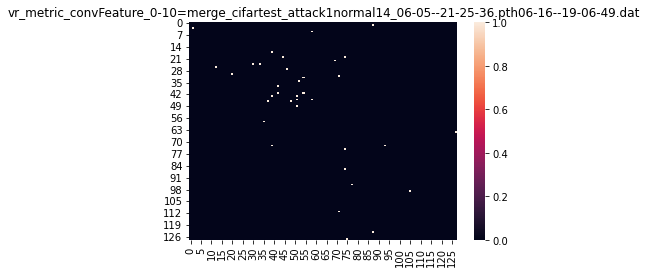

33
[1.1970000267028809, 16.75, 4.75600004196167, 18.625999450683594]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


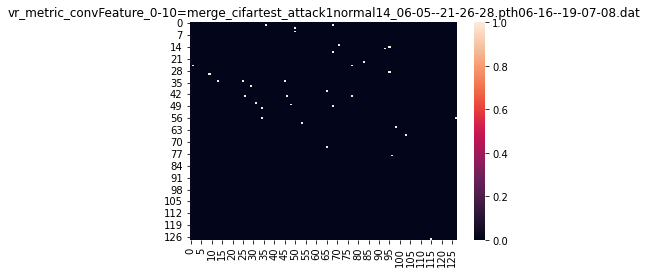

38
[1.309000015258789, 12.477999687194824, 1.7660000324249268, 13.319000244140625]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


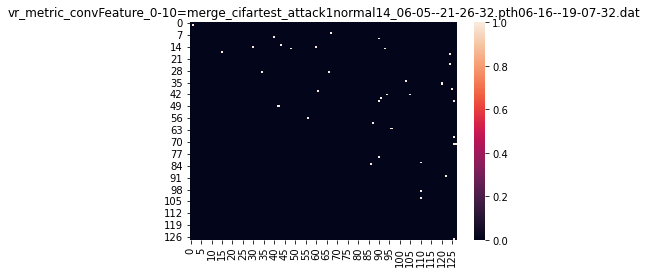

36
[1.3519999980926514, 12.541999816894531, 1.7669999599456787, 17.749000549316406]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


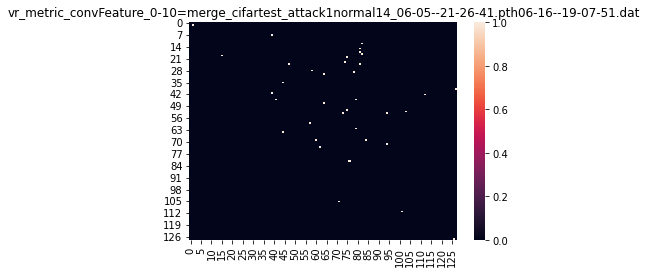

30
[2.812000036239624, 14.767999649047852, 6.564000129699707, 16.839000701904297]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


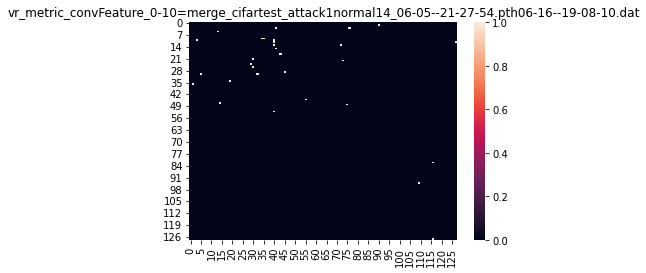

39
[1.7920000553131104, 12.102999687194824, 4.906000137329102, 15.763999938964844]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


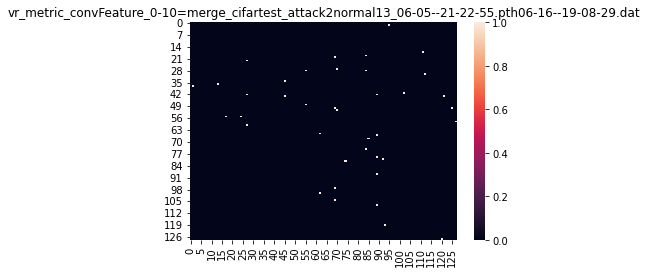

30
[2.2809998989105225, 14.718000411987305, 3.9590001106262207, 15.524999618530273]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


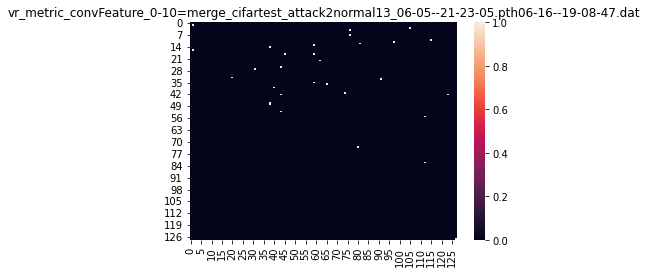

35
[1.8539999723434448, 12.986000061035156, 3.5160000324249268, 14.980999946594238]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


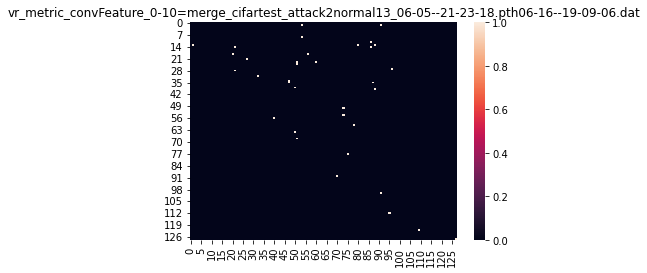

30
[1.6069999933242798, 16.125, 5.340000152587891, 17.465999603271484]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


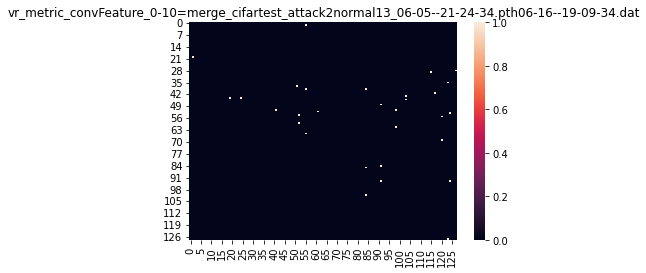

33
[1.8009999990463257, 12.930000305175781, 3.5139999389648438, 16.145000457763672]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


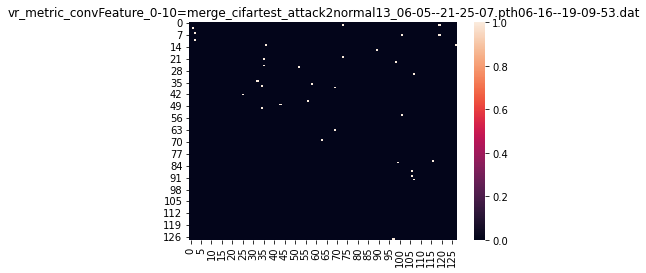

31
[1.7649999856948853, 12.253999710083008, 6.214000225067139, 15.199000358581543]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


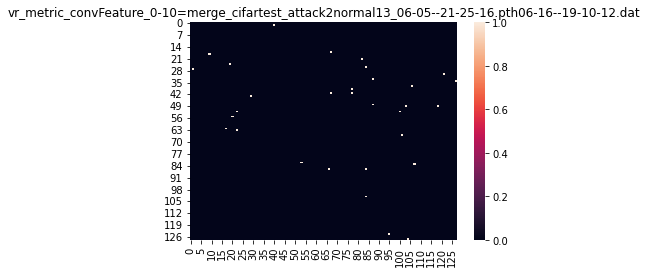

30
[1.1160000562667847, 11.916999816894531, 3.700000047683716, 16.812000274658203]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


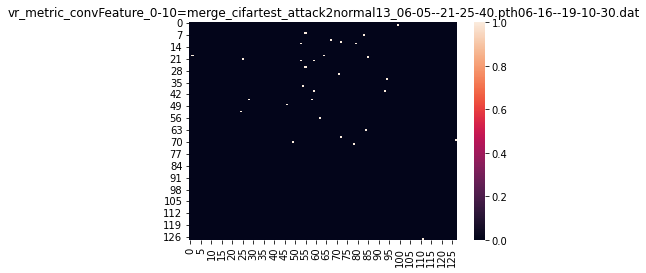

31
[1.475000023841858, 11.168999671936035, 3.3420000076293945, 13.755000114440918]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


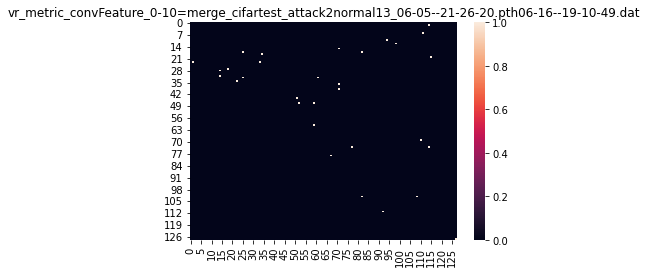

32
[1.0110000371932983, 10.92199993133545, 1.8769999742507935, 16.211000442504883]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


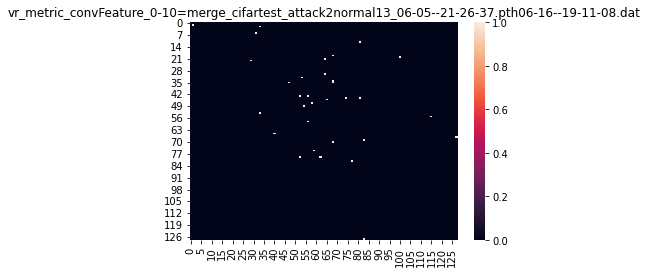

35
[1.4819999933242798, 9.154000282287598, 5.060999870300293, 15.472000122070312]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


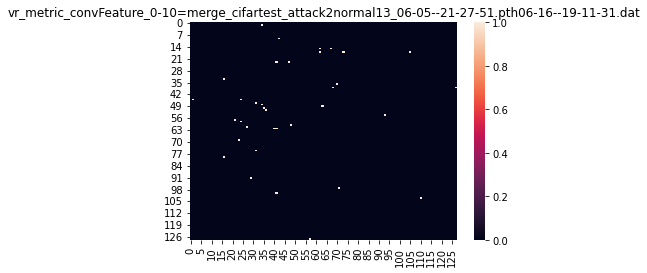

38
[3.5820000171661377, 15.279999732971191, 8.630999565124512, 19.80500030517578]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


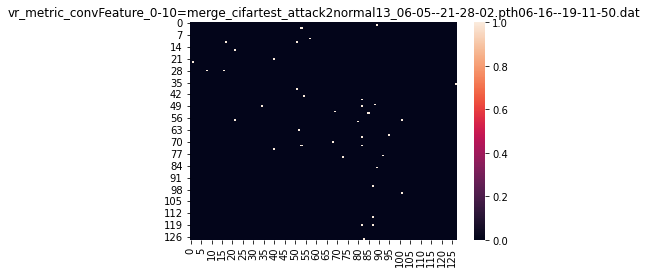

36
[3.246999979019165, 13.92300033569336, 5.1479997634887695, 15.920000076293945]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


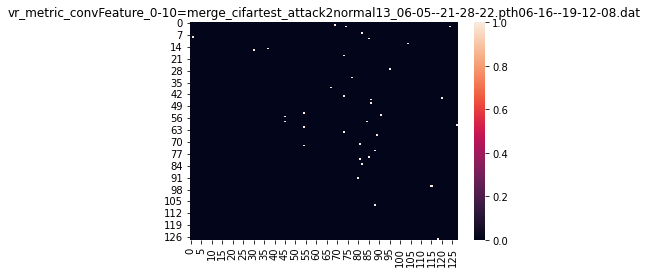

38
[2.7760000228881836, 10.85200023651123, 8.315999984741211, 15.225000381469727]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


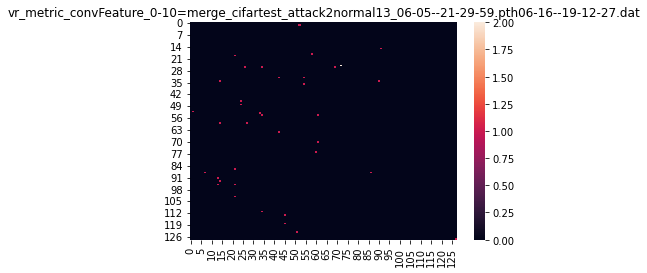

36
[1.2730000019073486, 11.781000137329102, 5.241000175476074, 16.643999099731445]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


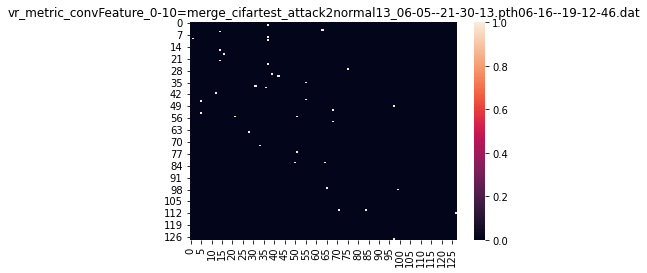

35
[2.739000082015991, 14.611000061035156, 7.2789998054504395, 18.55299949645996]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


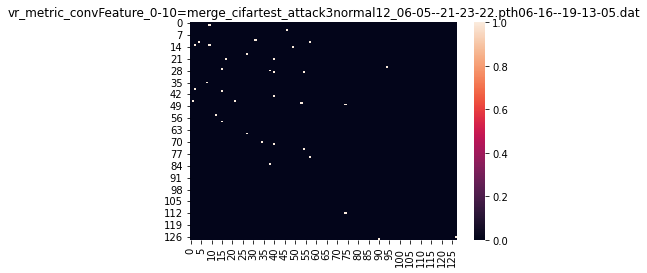

31
[1.2549999952316284, 12.845000267028809, 4.870999813079834, 17.020000457763672]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


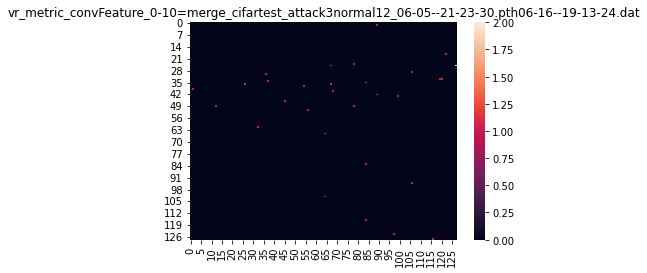

33
[2.371000051498413, 12.055999755859375, 4.559999942779541, 16.761999130249023]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


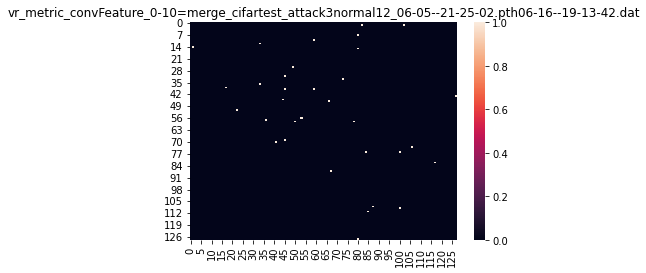

34
[1.3270000219345093, 10.99899959564209, 3.4860000610351562, 15.111000061035156]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


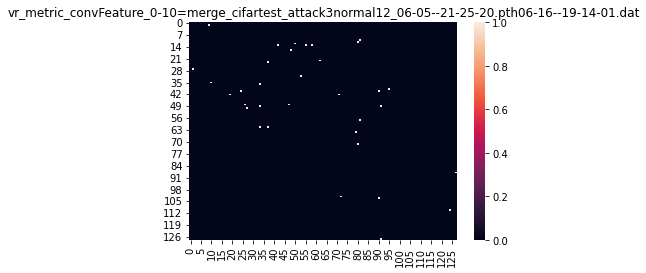

34
[2.005000114440918, 15.21500015258789, 5.9070000648498535, 19.22800064086914]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


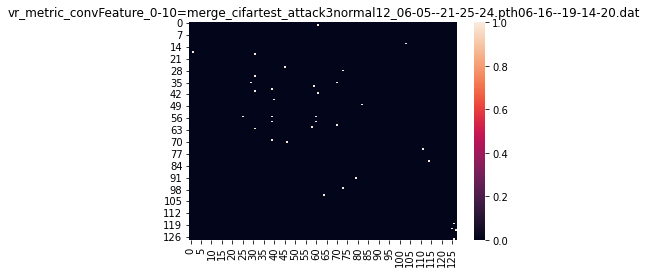

40
[1.7740000486373901, 12.326000213623047, 6.6539998054504395, 17.336000442504883]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


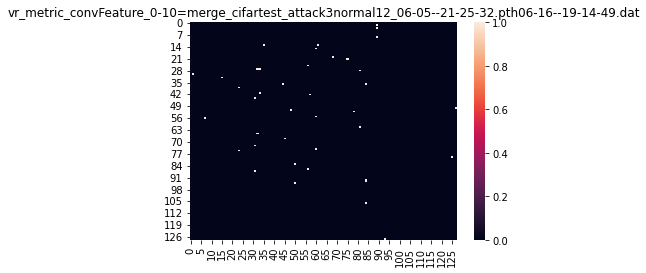

34
[1.628999948501587, 10.52299976348877, 3.0239999294281006, 18.649999618530273]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


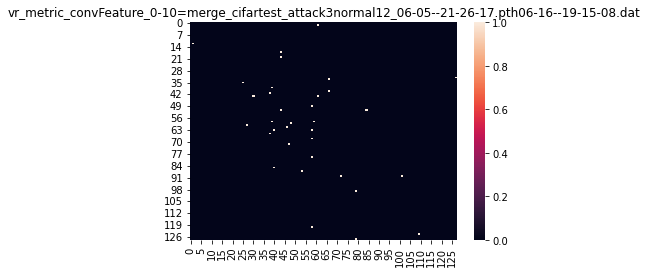

37
[1.2860000133514404, 15.130000114440918, 3.135999917984009, 20.011999130249023]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


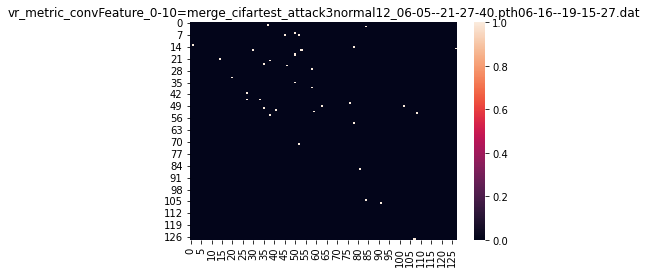

36
[2.9600000381469727, 10.911999702453613, 7.304999828338623, 15.675999641418457]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


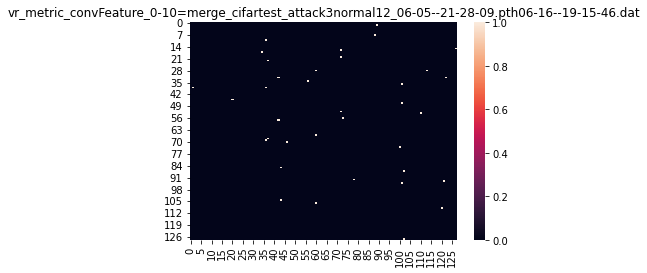

32
[1.9919999837875366, 10.626999855041504, 6.636000156402588, 13.5]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


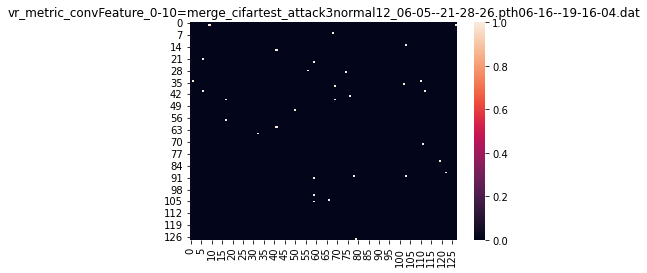

35
[1.6430000066757202, 12.350000381469727, 3.7060000896453857, 15.486000061035156]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


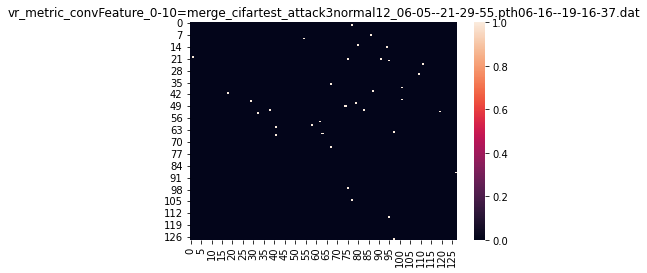

32
[1.253999948501587, 12.088000297546387, 5.125, 16.8700008392334]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


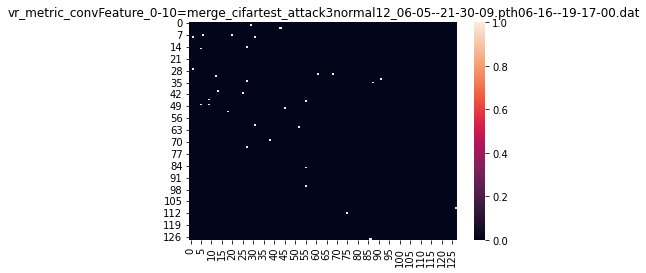

In [11]:
for h1 in H1_dgm:
    print(len(h1[0]))
    print(gridsize(h1[0]))
    print(makegrid(h1[0],gridsize(h1[0])))
    np.savetxt("./grids/h_"+h1[1]+".dat", makegrid(h1[0],gridsize(h1[0])))
    grid = pd.DataFrame(makegrid(h1[0],gridsize(h1[0])))
    plot = seaborn.heatmap(grid)
    plt.title(h1[1])
    plt.show()